# thal1 1-parameter Bifurcation Diagrams

Including trajectories over time

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import thal1 as t1
from lib.functions import g3

from lib.util import (get_phase, _get_sol,load_bif1d_f,load_phis_force,load_bif1d_f_u,load_phis_force,load_phis_force_u,run_bif1d_f_u)

from generate_figures import _full_thal1

from lib.rhs import _redu_c, _full, rhs_avg_1df
from lib.plot_util import add_diagram_1d

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
def g4(x):
    return (g3(x)/2.7)**3

In [3]:
kw_sim = {'rtol':1e-6,'atol':1e-6,'method':'LSODA'}

In [4]:
pd1 = {'gL':0.05,'gna':3,'gk':5,
       'gt':5,'eL':-70,'ena':50,
       'ek':-90,'et':0,'esyn':-1,
       'c':1,'alpha':3,'beta':2,
       'sigmat':0.8,'vt':-20,
       'ib':8.5,'del':0,'om':1,'om_fix':1}

In [5]:
# default period must be 2*np.pi
kws1 = {'var_names':['v','h','r'],
        'pardict':pd1,
        'rhs':t1.rhs,
        'forcing_fn':[lambda x: -g4(x),lambda x:20*(g4(x+2))],
        'init':np.array([-.64,0.71,0,10.6]),
        'TN':20000,
        'trunc_order':1,
        'z_forward':False,
        'i_forward':False,
        'i_bad_dx':[False,True,False,False],
        'max_iter':20,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':1,
        'save_fig':True}

## Defs

In [6]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-9,'atol':1e-9}

In [7]:
eps_list11r = np.linspace(0.001,.1,50)
etup11 = (.001,.1,50)

In [8]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [9]:
system1 = rsp(idx=0,model_name='thalf0',**kws1)

mkdir ./data/thalf0/
* Loading LC data...
self.T 6.283185307179586 omfix 0.9901981419217009
self.T 6.283185307179586
LC0 ini[-0.10742889  0.22848617  0.09385013]
LC0 fin[-0.10742888  0.22848618  0.09385012]
loaded coupling expansions
* Loading monodromy...
* Floquet Exponent kappa = -0.024354475767650915
* Loading g symbolic...
* Computing g...
g0 ini[0. 0. 0.]
g0 fin[0. 0. 0.]
g1 ini[-0.00392142  0.93590098  0.35224137]
g1 fin[-0.00392143  0.93590099  0.35224137]
* Loading heterogeneous terms...
* Computing z...
z0 ini[-0.86890692 -1.20965438  3.20436348]
z0 fin[-0.8689069  -1.20965436  3.20436343]
z1 ini[ 2.63290751  1.04789043 -0.20900076]
z1 fin[ 2.63290751  1.04789043 -0.20900076]
* Computing i...
i0 ini[ 0.14832161 -0.01130593  2.87065338]
i0 fin[ 0.14832161 -0.01130593  2.87065338]
i1 ini[-0.08308496  0.69291958 -0.06360563]
i1 fin[-0.08308501  0.69291952 -0.06360563]


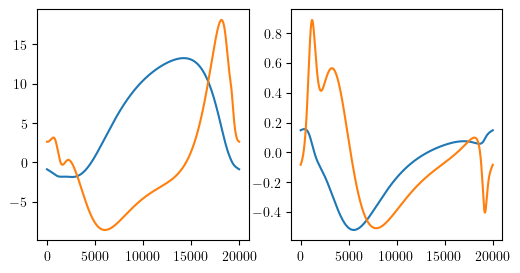

In [10]:
fig,axs = plt.subplots(1,2,figsize=(6,3))
for k in range(system1.miter):
    axs[0].plot(system1.z['dat'][k][:,0])

for k in range(system1.miter):
    axs[1].plot(system1.i['dat'][k][:,0])

# 1:1

In [11]:
recompute_list = ['h_data_thalf0','h_data_thalf0','p_data_thalf0','p_data_thalf0']
recompute_list = []
kw_11 = {'system1':system1,'system2':None,'_n':('om0',1),'_m':('om1',1),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [12]:
del11_p0 = 0.0
a11 = nm.nmCoupling(**kw_11)
a11.del1 = del11_p0

Initializing 11 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [13]:
# aa = a11
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# if aa.system1.miter == 1:
#     axs = np.asarray([axs])
# etemp = .1
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(aa.x,h)
# plt.tight_layout()

### Plot 1par

In [14]:
etup = (.005,.1,.005)
atemp = a11
dtemp = del11_p0
out = load_bif1d_f(_full_thal1,atemp,dtemp,etup=etup,recompute=False,phi0=2)

In [15]:
erange = out[:,0]
inits = out[:,1:]

In [16]:
philist = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=False,phi0=2)

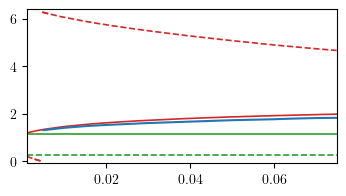

In [17]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp,(.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp,(.001,.075,200), rhs=rhs_avg_1df, miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Unstable

In [18]:
etupu = (.001,0,-.0004)
phi0 = 6.1
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,phi0=phi0)
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,phi0=phi0)
np.mod(-philist,2*np.pi)
print(list(out[-1]),',',etupu,philist[-1])
y = out

etupu = (.001,.01,.0004)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[0][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[0][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,philist[-1])
y = out

etupu = (.01,.02,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,philist[-1])
y = out

etupu = (.02,.04,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,philist[-1])
y = out

etupu = (.04,.07,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,philist[-1])
y = out

etupu = (.069,.073,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,philist[-1])
y = out

etupu = (.073,.075,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,philist[-1])
y = out

[0.0002000000000000001, -0.18945403623819065, 0.09591438239943723, 0.09301948731414543] , (0.001, 0, -0.0004) 6.024517542563309
[-0.18945403623819065, 0.09591438239943723, 0.09301948731414543] , (0.001, 0.01, 0.0004) 0.23133223538372505
[-0.20444447801075152, 0.4909821100889541, 0.09259549216606044] , (0.01, 0.02, 0.001) 0.5313322353837222
[-0.36642158515763196, 0.6326878938044321, 0.08952204239871353] , (0.02, 0.04, 0.001) 1.0613322353837233
[-0.4277186486464589, 0.6220908718635058, 0.07457083836889453] , (0.04, 0.07, 0.001) 1.8713322353837256
[-0.42630436741844424, 0.5198888162560811, 0.03370344281380619] , (0.069, 0.073, 0.001) 2.0913322353837245
[-0.4234291518294378, 0.5098816114326619, 0.030887649460253186] , (0.073, 0.075, 0.001) 3.1413322353837216


### Sims

In [19]:
# coupling and init
eps11_p0 = .012
th_init11_p0 = 4

In [20]:
# sim params
dt = .01;T_p0=1000
t11_p0 = np.arange(0,T_p0,dt)
args11_p0 = {'args':(a11,eps11_p0,del11_p0),'t_eval':t11_p0,**kw_sim,'dense_output':True}

In [21]:
y0_p0 = a11.system1.lc['dat'][int((th_init11_p0/(2*np.pi))*a11.system1.TN),:]
args0 = [a11,eps11_p0,del11_p0]

solf = _get_sol(_full_thal1,y0_p0,t11_p0,args=args0,recompute=False)        
tp,fp = get_phase(t11_p0,solf,skipn=100,system1=a11.system1)
force_phase = (a11._m[1]+del11_p0)*tp
fp2 = np.mod(fp-a11.om*force_phase,2*np.pi)

args0 = [a11,eps11_p0,del11_p0]
args1 = {'t_eval':t11_p0,'t_span':[0,t11_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init11_p0],**args1)

args0 = [a11,eps11_p0,del11_p0,1]
args1 = {'t_eval':t11_p0,'t_span':[0,t11_p0[-1]],'args':(*args0,),**kw_sim}

solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init11_p0],**args1)

### Sim plots

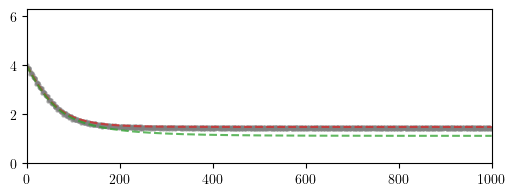

In [22]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p0)

# 1d solution over time
axs.plot(t11_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t11_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.01

In [23]:
del11_p0 = 0.01
a11 = nm.nmCoupling(**kw_11)
a11.del1 = del11_p0

Initializing 11 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

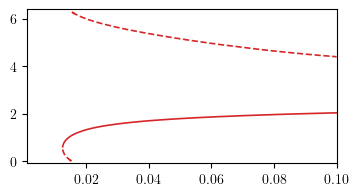

In [24]:
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,a11,del11_p0,(.001,.1,500),rhs=rhs_avg_1df)

### Unstable

In [25]:
etupu = (.013,.02,.001)
init0 = np.array([-0.18945403623819065, 0.09591438239943723, 0.09301948731414543])
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=init0)

print(list(y[-2][1:]),',',etupu,np.mod(-philist,2*np.pi)[-2])
y = out

etupu = (.02,.025,.002)
init0 = np.array([-0.18945403623819065, 0.09591438239943723, 0.09301948731414543])
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=init0)
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.024,.028,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.027,.035,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.027,.035,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

[-0.41997362474490507, 0.49900560968952595, 0.02801986775624381] , (0.013, 0.02, 0.001) 6.031965272146191
[-0.26229040942775206, 0.5567494872609862, 0.08972576172263777] , (0.02, 0.025, 0.002) 1.4019652721461888
[-0.6064727230094679, 0.19136356990065642, 0.12511030231155962] , (0.024, 0.028, 0.001) 1.461965272146191
[-0.6152031311120967, 0.2041856029731435, 0.13226924726288497] , (0.027, 0.035, 0.001) 1.5719652721461905
[-0.6306409610981385, 0.22890445907268492, 0.15300679277425475] , (0.027, 0.035, 0.001) 1.5719652721461905


## del=0.03

In [26]:
del11_p1 = 0.03
a11.del1 = del11_p1

In [27]:
etupu = (.023,.03,.001)
init0 = np.array([-0.12398772,  0.18925807,  0.09165775])
out = load_bif1d_f_u(_full_thal1,a11,del11_p1,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a11,del11_p1,etup=etupu,period_multiple=10,use_point=init0)

print(list(init0),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.029,.04,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p1,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p1,etup=etupu,period_multiple=10,use_point=y[-1][1:])

print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.039,.05,.001)
out = load_bif1d_f_u(_full_thal1,a11,del11_p1,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p1,etup=etupu,period_multiple=10,use_point=y[-1][1:])

print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.049,.07,.0003)
out = load_bif1d_f_u(_full_thal1,a11,del11_p1,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a11,del11_p1,etup=etupu,period_multiple=10,use_point=y[-1][1:])

print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

[-0.12398772, 0.18925807, 0.09165775] , (0.023, 0.03, 0.001) 5.974984406010515
[-0.39413122601742295, 0.612823043800616, 0.07738862167682786] , (0.029, 0.04, 0.001) 5.5649844060105185
[-0.4186246669805977, 0.5923473357739142, 0.06430485021839023] , (0.039, 0.05, 0.001) 5.234984406010513
[-0.4188531371309764, 0.5187601347862301, 0.03531771041111262] , (0.049, 0.07, 0.0003) 4.45480449612742


### H functions

In [28]:
# aa = a11
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# axs = np.asarray(axs)
# etemp = .5
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)

# plt.tight_layout()

### Plot 1par

In [29]:
etup = (.03,.075,.005)
atemp = a11
dtemp = del11_p1

out = load_bif1d_f(_full_thal1,atemp,dtemp,etup=etup,recompute=True)

phi0 in run_bif1d_f 0
Y_prev,T_est [-0.57381885  0.14890436  0.12600904] 6.100179909883093 0.03 0.03 0.075 0.005 0
Y_est [-0.57381885  0.14890436  0.12600904]
0, eps=0.03000 [-0.57137173  0.14665787  0.12806985]
Y_est [-0.57137173  0.14665787  0.12806985]
1, eps=0.03500 [-0.59961928  0.173725    0.14309883]
Y_est [-0.59961928  0.173725    0.14309883]
2, eps=0.04000 [-0.61609387  0.19381994  0.15867453]
Y_est [-0.61609387  0.19381994  0.15867453]
3, eps=0.04500 [-0.6274472   0.20943575  0.17517292]
Y_est [-0.6274472   0.20943575  0.17517292]
4, eps=0.05000 [-0.63609958  0.22196126  0.19279904]
Y_est [-0.63609958  0.22196126  0.19279904]
5, eps=0.05500 [-0.64314176  0.23222982  0.2116937 ]
Y_est [-0.64314176  0.23222982  0.2116937 ]
6, eps=0.06000 [-0.64913415  0.24076967  0.23196622]
Y_est [-0.64913415  0.24076967  0.23196622]
7, eps=0.06500 [-0.65439193  0.24793043  0.25370762]
Y_est [-0.65439193  0.24793043  0.25370762]
8, eps=0.07000 [-0.6591048   0.25395197  0.27699687]


In [30]:
erange = out[:,0]
inits = out[:,1:]

In [31]:
philist = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=False)

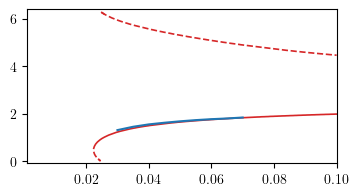

In [32]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp,(.001,.1,500),rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp,(.001,.1,500),rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [33]:
# coupling and init
eps11_p1 = 0.03
th_init11_p1 = 4

In [34]:
# sim params
dt = .01;T_p050=300
t11_p1 = np.arange(0,T_p050,dt)
args11_p1 = {'args':(a11,eps11_p1,del11_p1),'t_eval':t11_p1,**kw_sim,'dense_output':True}

In [35]:
y0_p050 = a11.system1.lc['dat'][int((th_init11_p1/(2*np.pi))*a11.system1.TN),:]
args0 = [a11,eps11_p1,del11_p1]

solf = _get_sol(_full_thal1,y0_p050,t11_p1,args=args0,recompute=False)        
tp,fp = get_phase(t11_p1,solf,skipn=100,system1=a11.system1)
force_phase = (a11._m[1]+del11_p1)*tp
fp2 = np.mod(fp-a11.om*force_phase,2*np.pi)

args1 = {'t_eval':t11_p1,'t_span':[0,t11_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init11_p1],**args1)

args0 = [a11,eps11_p1,del11_p1,1]
args1 = {'t_eval':t11_p1,'t_span':[0,t11_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init11_p1],**args1)

### Sim plots

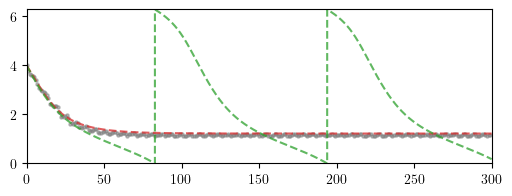

In [36]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p050)

# 1d solution over time
axs.plot(t11_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t11_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 2:1

In [37]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_21 = {'system1':system1, 'system2':None, '_n':('om0',2),'_m':('om1',1), 'NH':1024, 'save_fig':False,  'recompute_list':recompute_list}

## del=0

In [38]:
a21 = nm.nmCoupling(**kw_21)
del21_p0 = 0
a21.del1 = del21_p0

Initializing 21 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

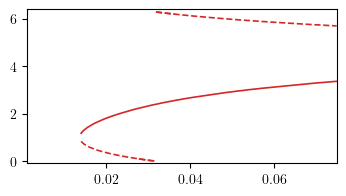

In [39]:
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,a21,del21_p0, (.001,.075,200), rhs=rhs_avg_1df)

### Unstable

In [40]:
etupu = (0.03, .051, 0.001)
init0 = [-0.1244944736165739, 0.18448098884264694, 0.09138371824400734]
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0)
print(out)
print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

# etupu = (.011,.02,.001)
# init0=np.array([-0.13294689655470115, 0.15020570933203883, 0.09379750503947978])
# out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0,recompute=False)
# philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0,recompute=False)
# np.mod(-philist,2*np.pi)
# print(list(init0),',',etupu,np.mod(-philist,2*np.pi)[-1])
# y = out

# etupu = (.019,.03,.001)
# init0=np.array([-0.13294689655470115, 0.15020570933203883, 0.09379750503947978])
# out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0,recompute=False)
# philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0,recompute=False)
# np.mod(-philist,2*np.pi)
# print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
# y = out

# print(y[-1][1:])


[[ 0.03       -0.13222582  0.21039019  0.08511494]
 [ 0.031      -0.13238432  0.22903046  0.08417169]
 [ 0.032      -0.13433746  0.24829993  0.08320849]
 [ 0.033      -0.13793247  0.26807592  0.08222672]
 [ 0.034      -0.14301111  0.28821222  0.08122772]
 [ 0.035      -0.14940895  0.30853434  0.08021277]
 [ 0.036      -0.1569545   0.3288364   0.07918308]
 [ 0.037      -0.16546866  0.34888098  0.07813978]
 [ 0.038      -0.1747649   0.36840415  0.07708393]
 [ 0.039      -0.18465048  0.38712634  0.07601653]
 [ 0.04       -0.19492957  0.40477108  0.07493847]
 [ 0.041      -0.20540808  0.42108826  0.07385059]
 [ 0.042      -0.21590037  0.43587883  0.07275362]
 [ 0.043      -0.22623673  0.44901405  0.07164823]
 [ 0.044      -0.23627067  0.46044433  0.070535  ]
 [ 0.045      -0.24588421  0.4701951   0.06941442]
 [ 0.046      -0.2549905   0.47835246  0.06828688]
 [ 0.047      -0.26353341  0.48504336  0.0671527 ]
 [ 0.048      -0.27148441  0.4904157   0.06601209]
 [ 0.049      -0.27883787  0.49

## del=-.005

In [41]:
a21 = nm.nmCoupling(**kw_21)
del21_p0 = -.005
a21.del1 = del21_p0

Initializing 21 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

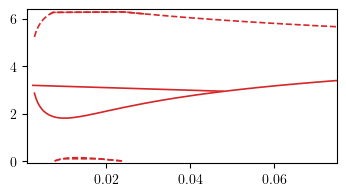

In [42]:
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,a21,del21_p0, (.001,.075,200), rhs=rhs_avg_1df)

### Unstable

In [43]:
etupu = (.01,.012,.001)
phi0=0
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,phi0=phi0,recompute=False)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,phi0=phi0,recompute=False)
print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.011,.02,.001)
init0=np.array([-0.13294689655470115, 0.15020570933203883, 0.09379750503947978])
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0,recompute=False)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0,recompute=False)
np.mod(-philist,2*np.pi)
print(list(init0),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

etupu = (.019,.03,.001)
init0=np.array([-0.13294689655470115, 0.15020570933203883, 0.09379750503947978])
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0,recompute=False)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0,recompute=False)
np.mod(-philist,2*np.pi)
print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out

print(y[-1][1:])


[-0.13294689655470115, 0.15020570933203883, 0.09379750503947978] , (0.01, 0.012, 0.001) 0.12884915565451216
[-0.13294689655470115, 0.15020570933203883, 0.09379750503947978] , (0.011, 0.02, 0.001) 0.0688491556545241
[-0.1244944736165739, 0.18448098884264694, 0.09138371824400734] , (0.019, 0.03, 0.001) 6.223608258347565
[-0.15129064  0.34321814  0.08447303]


## del=-.01

In [44]:
a21 = nm.nmCoupling(**kw_21)
del21_p0 = -.01
a21.del1 = del21_p0

Initializing 21 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

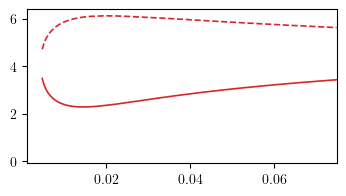

In [45]:
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,a21,del21_p0, (.001,.075,200), rhs=rhs_avg_1df)

### Unstable

In [46]:
etupu = (.03,.04,.001)
init0 = np.array([-0.15129064,  0.34321814,  0.08447303])
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0)
print(list(init0[1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out


print(y[-1][1:])


[0.34321814, 0.08447303] , (0.03, 0.04, 0.001) 6.029569990424163
[-0.31346033  0.55701472  0.07300908]


## del=-.02

In [47]:
a21 = nm.nmCoupling(**kw_21)
del21_p0 = -.02
a21.del1 = del21_p0

Initializing 21 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

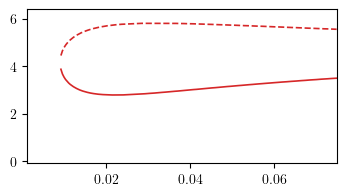

In [48]:
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,a21,del21_p0, (.001,.075,200), rhs=rhs_avg_1df)

### Unstable

In [49]:
etupu = (.03,.0,-.001)
init0 = np.array([-0.31346033,  0.55701472,  0.07300908])
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0)
print(list(init0[1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
print(list(out[21]))
y = out


etupu = (.03,.04,.001)
init0 = np.array([-0.31346033,  0.55701472,  0.07300908])
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=init0)
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=init0)
print(list(init0),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out


etupu = (.039,.06,.001)
out = load_bif1d_f_u(_full_thal1,a21,del21_p0,etup=etupu,use_point=y[-1][1:])
philist = load_phis_force_u(_full_thal1,a21,del21_p0,etup=etupu,period_multiple=10,use_point=y[-1][1:])
print(list(y[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out



print(y[-1][1:])


[0.55701472, 0.07300908] , (0.03, 0.0, -0.001) nan
[0.00899999999999998, -0.5029733643300021, 0.650841771234475, 0.09877843030259732]
[-0.31346033, 0.55701472, 0.07300908] , (0.03, 0.04, 0.001) 5.880043303518511
[-0.37272670156723875, 0.59792594127064, 0.07179809619626129] , (0.039, 0.06, 0.001) 5.860043303518501
[-0.37831193  0.53878538  0.05133508]


In [50]:
etup = (.005,.075,.01)
out = load_bif1d_f(_full_thal1,a21,del21_p0,etup=etup,phi0=2,recompute=False)
philist = load_phis_force(_full_thal1,a21,del21_p0,etup=etup,phi0=2,period_multiple=10,recompute=False)
print(np.mod(-philist,2*np.pi))
print(list(init0[1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])

[       nan 2.54862972 2.18862972 2.04862972 1.90862972 3.0400433  3.1800433 ]
[0.55701472, 0.07300908] , (0.039, 0.06, 0.001) 3.1800433035185085


# 1:2

In [51]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_12 = {'system1':system1,'system2':None,'_n':('om0',1),'_m':('om1',2),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [52]:
del12_p0 = 0
a12 = nm.nmCoupling(**kw_12)
a12.del1 = del12_p0

Initializing 12 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

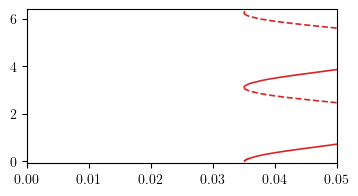

In [53]:
atemp = a12
dtemp = del12_p0
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs, atemp, dtemp, (.0,.05,1000), rhs=rhs_avg_1df)
# add_diagram_1d(axs, atemp, dtemp, (.001,.01,1000), rhs=rhs_avg_1df, miter=1, color='tab:green')

In [54]:
# another technique. Binary search on phi0 manually until it finds an unstable branch.

phi0 in run_bif1d_f 1.35
Y_est [-0.47082926  0.65528556  0.09777856]
0, eps=0.04500 [-0.38854949  0.64979185  0.09414266]
Y_est [-0.38854949  0.64979185  0.09414266]
1, eps=0.04600 [-0.39369554  0.6513832   0.09496403]
Y_est [-0.39369554  0.6513832   0.09496403]
2, eps=0.04700 [-0.39837031  0.65268245  0.09586944]
phi0 in run_bif1d_f 1.35
Y_est [-0.38854949  0.64979185  0.09414266]
0, eps=0.04500 [-0.38854949  0.64979185  0.09414267]
Y_est [-0.38854949  0.64979185  0.09414267]
1, eps=0.04600 [-0.39369554  0.6513832   0.09496403]
Y_est [-0.39369554  0.6513832   0.09496403]
2, eps=0.04700 [-0.39837031  0.65268245  0.09586944]
[-0.39837031062642664, 0.6526824453936779, 0.09586944336882908] , (0.039, 0.06, 0.001) 5.551853071795861
[5.62185307 5.59185307 5.55185307]


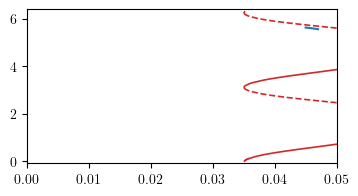

In [55]:
etup = (.045,.047,.001)
phi0=1.35
out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,phi0=phi0,recompute=True)
philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,phi0=phi0,recompute=True)
print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out
print(np.mod(-philist,2*np.pi))
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs, atemp, dtemp, (.0,.05,1000), rhs=rhs_avg_1df)

axs.plot(out[:,0],np.mod(-philist,2*np.pi))

In [56]:
etup = (.045,.033,-.001)
init0 = [-0.39837031062642664, 0.6526824453936779, 0.09586944336882908]
out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,use_point=init0)
philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,use_point=init0)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

etup = (.045,.056,.001)
init0 = [-0.39837031062642664, 0.6526824453936779, 0.09586944336882908]
out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,use_point=init0)
philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,use_point=init0)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

# etup = (.046,.056,.001)
# init0 = [-0.39837031062642664, 0.6526824453936779, 0.09586944336882908]
# out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,use_point=y[-1][1:])
# philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,use_point=y[-1][1:])
# print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
# y = out

[-0.39837031062642664, 0.6526824453936779, 0.09586944336882908] , (0.045, 0.033, -0.001) 0.02866776461627296
[-0.39837031062642664, 0.6526824453936779, 0.09586944336882908] , (0.045, 0.056, 0.001) 5.20185307179586


### Plot 1par

In [57]:
etup = (.036,.07,.01)

In [58]:
out1 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=1, recompute=False,max_iter=100)
erange1 = out1[:,0]

In [59]:
philist1 = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=False,phi0=1)

In [61]:
phi0 = 4
out2 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=100)
erange2 = out2[:,0]

In [63]:
philist2 = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=False,phi0=phi0)

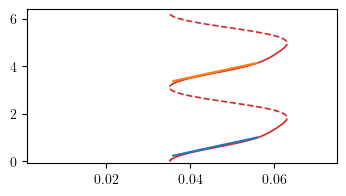

In [69]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs, atemp, dtemp, (.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs, atemp, dtemp, (.001,.075,200), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange1,np.mod(-philist1,2*np.pi))
axs.plot(erange2,np.mod(-philist2,2*np.pi))

## del=-0.025

In [72]:
del12_p1 = -.025
a12 = nm.nmCoupling(**kw_12)
a12.del1 = del12_p1

Initializing 12 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

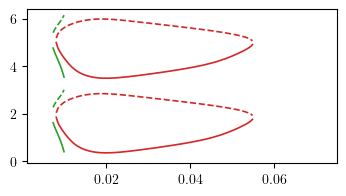

In [74]:
atemp = a12
dtemp = del12_p1
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,atemp,dtemp, (.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp, (.001,.075,200), rhs=rhs_avg_1df, miter=1, color='tab:green')

In [75]:
# another technique. Binary search on phi0 manually until it finds an unstable branch.

[-0.3821619273654046, 0.6544584217344965, 0.09700385341951662] , (0.039, 0.06, 0.001) 5.677658992866944
[5.74765899 5.72765899 5.69765899 5.67765899]


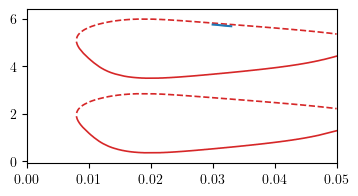

In [76]:
etup = (.03,.033,.001)
phi0=.5
out = load_bif1d_f_u(_full_thal1,a12,del12_p1,etup=etup,phi0=phi0,recompute=False)
philist = load_phis_force_u(_full_thal1,a12,del12_p1,etup=etup,period_multiple=10,phi0=phi0,recompute=False)
print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out
print(np.mod(-philist,2*np.pi))

fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs, atemp, dtemp, (.0,.05,1000), rhs=rhs_avg_1df)

axs.plot(out[:,0],np.mod(-philist,2*np.pi))

In [77]:
init0 = [-0.36608117,  0.64792313,  0.09628009]
etup = (.03,.007,-.001)
out = load_bif1d_f_u(_full_thal1,a12,del12_p1,etup=etup,use_point=init0,recompute=False)
philist = load_phis_force_u(_full_thal1,a12,del12_p1,etup=etup,period_multiple=10,use_point=init0,recompute=False)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

etup = (.03,.052,.001)
init0 = [-0.36608117,  0.64792313,  0.09628009]
out = load_bif1d_f_u(_full_thal1,a12,del12_p1,etup=etup,use_point=init0,recompute=False)
philist = load_phis_force_u(_full_thal1,a12,del12_p1,etup=etup,period_multiple=10,use_point=init0,recompute=False)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

# etup = (.046,.056,.001)
# init0 = [-0.39837031062642664, 0.6526824453936779, 0.09586944336882908]
# out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,use_point=y[-1][1:])
# philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,use_point=y[-1][1:])
# print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
# y = out

[-0.36608117, 0.64792313, 0.09628009] , (0.03, 0.007, -0.001) 5.167658992866946
[-0.36608117, 0.64792313, 0.09628009] , (0.03, 0.052, 0.001) 5.067658992866945


# 2:3

In [80]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_23 = {'system1':system1,'system2':None,'_n':('om0',2),'_m':('om1',3),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

## del=-.017

In [92]:
del23_p0 = -.017
a23 = nm.nmCoupling(**kw_23)
a23.del1 = del23_p0

Initializing 23 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

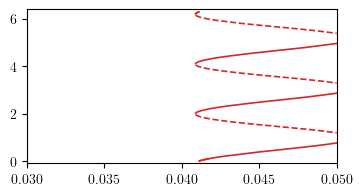

In [93]:
atemp = a23
dtemp = del23_p0
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,atemp,dtemp, (.03,.05,500), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp, (.03,.05,500), rhs=rhs_avg_1df,miter=1, color='tab:green')

phi0 in run_bif1d_f 2.3
Y_est [-0.53737372  0.60788151  0.09953368]
0, eps=0.04000 [-0.38172447  0.65419535  0.10914178]
Y_est [-0.38172447  0.65419535  0.10914178]
1, eps=0.04100 [-0.40181274  0.65751012  0.10727366]
Y_est [-0.40181274  0.65751012  0.10727366]
2, eps=0.04200 [-0.41710816  0.65704045  0.10503084]
phi0 in run_bif1d_f 2.3
Y_est [-0.38172447  0.65419535  0.10914178]
0, eps=0.04000 [-0.38172447  0.65419535  0.10914178]
Y_est [-0.38172447  0.65419535  0.10914178]
1, eps=0.04100 [-0.40181274  0.65751012  0.10727366]
Y_est [-0.40181274  0.65751012  0.10727366]
2, eps=0.04200 [-0.41710816  0.65704045  0.10503084]
[-0.4171081581971554, 0.6570404518999735, 0.1050308387725617] , (0.039, 0.06, 0.001) 5.224051049464645
[5.46405105 5.34405105 5.22405105]


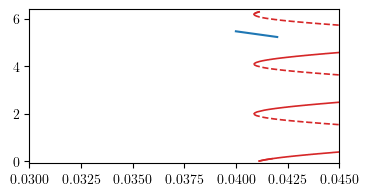

In [94]:
etup = (.04,.042,.001)
phi0=2.3
out = load_bif1d_f_u(_full_thal1,a23,del23_p0,etup=etup,phi0=phi0,recompute=True)
philist = load_phis_force_u(_full_thal1,a23,del23_p0,etup=etup,period_multiple=10,phi0=phi0,recompute=True)
print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out
print(np.mod(-philist,2*np.pi))
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs, atemp, dtemp, (.03,.045,1000), rhs=rhs_avg_1df)

axs.plot(out[:,0],np.mod(-philist,2*np.pi))

In [96]:
init0 = [-0.4171081581971554, 0.6570404518999735, 0.1050308387725617]
etup = (.04,.0385,-.0005)
out = load_bif1d_f_u(_full_thal1,a23,del23_p0,etup=etup,use_point=init0,recompute=True)
philist = load_phis_force_u(_full_thal1,a23,del23_p0,etup=etup,period_multiple=10,use_point=init0,recompute=True)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

etup = (.04,.06,.0005)
init0 = [-0.4171081581971554, 0.6570404518999735, 0.1050308387725617]
out = load_bif1d_f_u(_full_thal1,a23,del23_p0,etup=etup,use_point=init0,recompute=True)
philist = load_phis_force_u(_full_thal1,a23,del23_p0,etup=etup,period_multiple=10,use_point=init0,recompute=True)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

# etup = (.046,.056,.001)
# init0 = [-0.39837031062642664, 0.6526824453936779, 0.09586944336882908]
# out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,use_point=y[-1][1:])
# philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,use_point=y[-1][1:])
# print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
# y = out

phi0 in run_bif1d_f 0
Y_est [-0.4171081581971554, 0.6570404518999735, 0.1050308387725617]
0, eps=0.04000 [-0.38172447  0.65419535  0.10914178]
Y_est [-0.38172447  0.65419535  0.10914178]
1, eps=0.03950 [-0.3669888   0.64961099  0.10989404]
Y_est [-0.3669888   0.64961099  0.10989404]
2, eps=0.03900 [-0.34425486  0.63988015  0.11047398]
Y_est [-0.34425486  0.63988015  0.11047398]
3, eps=0.03850 [-0.29678661  0.61042176  0.11074879]
Y_est [-0.29678661  0.61042176  0.11074879]
4, eps=0.03800 [nan nan nan]
phi0 in run_bif1d_f 0
Y_est [-0.4171081581971554, 0.6570404518999735, 0.1050308387725617]
0, eps=0.04000 [-0.38172447  0.65419535  0.10914178]
Y_est [-0.38172447  0.65419535  0.10914178]
1, eps=0.03950 [-0.3669888   0.64961099  0.10989404]
Y_est [-0.3669888   0.64961099  0.10989404]
2, eps=0.03900 [-0.34425486  0.63988015  0.11047398]
Y_est [-0.34425486  0.63988015  0.11047398]
3, eps=0.03850 [-0.29678661  0.61042176  0.11074879]
Y_est [-0.29678661  0.61042176  0.11074879]
4, eps=0.03800 

## del=-.023

In [97]:
del23_p0 = -.023
a23 = nm.nmCoupling(**kw_23)
a23.del1 = del23_p0

Initializing 23 Coupling...
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


<Axes: >

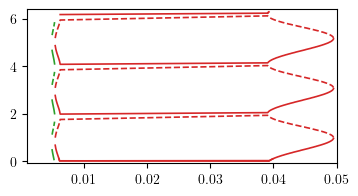

In [98]:
atemp = a23
dtemp = del23_p0
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs,atemp,dtemp, (.001,.05,500), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp, (.001,.05,500), rhs=rhs_avg_1df,miter=1, color='tab:green')

[-0.44085744574529734, 0.652423876533637, 0.10174957244774928] , (0.039, 0.06, 0.001) 5.006027937087686
[5.28602794 5.16602794 5.00602794]


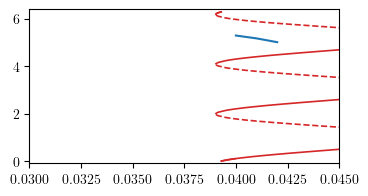

In [99]:
etup = (.04,.042,.001)
phi0=2.4
out = load_bif1d_f_u(_full_thal1,a23,del23_p0,etup=etup,phi0=phi0,recompute=False)
philist = load_phis_force_u(_full_thal1,a23,del23_p0,etup=etup,period_multiple=10,phi0=phi0,recompute=False)
print(list(out[-1][1:]),',',etupu,np.mod(-philist,2*np.pi)[-1])
y = out
print(np.mod(-philist,2*np.pi))
fig,axs = plt.subplots(figsize=(4,2))
add_diagram_1d(axs, atemp, dtemp, (.03,.045,1000), rhs=rhs_avg_1df)

axs.plot(out[:,0],np.mod(-philist,2*np.pi))

In [101]:
init0 = [-0.44085744574529734, 0.652423876533637, 0.10174957244774928]
etup = (.04,.036,-.0005)
out = load_bif1d_f_u(_full_thal1,a23,del23_p0,etup=etup,use_point=init0,recompute=True)
philist = load_phis_force_u(_full_thal1,a23,del23_p0,etup=etup,period_multiple=10,use_point=init0,recompute=True)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

etup = (.04,.06,.0005)
init0 = [-0.44085744574529734, 0.652423876533637, 0.10174957244774928]
out = load_bif1d_f_u(_full_thal1,a23,del23_p0,etup=etup,use_point=init0,recompute=True)
philist = load_phis_force_u(_full_thal1,a23,del23_p0,etup=etup,period_multiple=10,use_point=init0,recompute=True)
print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
y = out

# etup = (.046,.056,.001)
# init0 = [-0.39837031062642664, 0.6526824453936779, 0.09586944336882908]
# out = load_bif1d_f_u(_full_thal1,a12,del12_p0,etup=etup,use_point=y[-1][1:])
# philist = load_phis_force_u(_full_thal1,a12,del12_p0,etup=etup,period_multiple=10,use_point=y[-1][1:])
# print(list(init0),',',etup,np.mod(-philist,2*np.pi)[-1])
# y = out

phi0 in run_bif1d_f 0
Y_est [-0.44085744574529734, 0.652423876533637, 0.10174957244774928]
0, eps=0.04000 [-0.41038489  0.65901515  0.10629877]
Y_est [-0.41038489  0.65901515  0.10629877]
1, eps=0.03950 [-0.40304974  0.65887386  0.10722282]
Y_est [-0.40304974  0.65887386  0.10722282]
2, eps=0.03900 [-0.39482352  0.65798675  0.10805567]
Y_est [-0.39482352  0.65798675  0.10805567]
3, eps=0.03850 [-0.38507159  0.65606566  0.10878804]
Y_est [-0.38507159  0.65606566  0.10878804]
4, eps=0.03800 [-0.37266423  0.65248744  0.10940509]
Y_est [-0.37266423  0.65248744  0.10940509]
5, eps=0.03750 [-0.35514208  0.64569791  0.10987979]
Y_est [-0.35514208  0.64569791  0.10987979]
6, eps=0.03700 [-0.32537421  0.63032211  0.11014871]
Y_est [-0.32537421  0.63032211  0.11014871]
7, eps=0.03650 [-0.24293145  0.55880851  0.10989238]
Y_est [-0.24293145  0.55880851  0.10989238]
8, eps=0.03600 [nan nan nan]
phi0 in run_bif1d_f 0
Y_est [-0.44085744574529734, 0.652423876533637, 0.10174957244774928]
0, eps=0.0400